In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import geopandas as gpd
import scipy.stats as sc
import matplotlib as mpl
import numpy as np

In [2]:
data = pd.read_csv('/home/slindhult/assignments/Capstone-1/Data/pollution_us_2000_2016.csv')

In [32]:
data

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.200,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.200,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.200,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.200,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,24599,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,...,Parts per billion,0.000000,0.0,2,NaN,Parts per million,0.091667,0.100,2,1.0
1746657,24600,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.067714,0.127,0,NaN
1746658,24601,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.100000,0.100,0,1.0
1746659,24602,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,0.000000,0.0,5,NaN,Parts per million,0.067714,0.127,0,NaN


In [3]:
cols_list = ['NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']
a = data.copy()
purged = a[(a[['NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour']] >=0).all(1)]

cleaned = purged.drop(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'County', 'City', 'NO2 Units',
       'O3 Units',
       'SO2 Units',
       
       'CO Units'], axis=1)
cleaned['Date'] = cleaned['Date Local']

clean = cleaned.groupby(['Date Local', 'Address','State']).agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})
clean = clean.reset_index()
clean.drop(['Address'],axis=1)

,Date Local,State,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,2000-01-01,Virginia,31.000000,41.0,23.0,39.0,0.002750,0.006,11.0,5.0,11.645834,16.8,10.0,26.0,1.244518,1.5000,2.5,16.0
1,2000-01-01,California,5.272727,19.0,17.0,18.0,0.025917,0.028,14.0,24.0,2.524026,5.5,17.0,10.0,0.270933,0.3000,5.0,3.0
2,2000-01-01,California,17.652174,27.0,2.0,25.0,0.019333,0.029,14.0,25.0,2.338961,3.0,8.0,4.0,0.447343,0.7000,4.0,7.0
3,2000-01-01,California,9.304348,24.0,7.0,23.0,0.032917,0.041,10.0,35.0,0.402795,2.3,9.5,4.0,0.466787,1.0000,9.0,9.0
4,2000-01-01,Louisiana,31.083333,72.0,18.0,70.0,0.023350,0.038,10.0,32.0,7.737500,12.3,2.0,21.0,0.845943,1.5000,20.5,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407552,2016-05-31,Iowa,5.390909,11.5,1.0,10.0,0.032895,0.042,10.0,39.0,0.077019,0.4,10.5,0.0,0.196568,0.2185,3.0,2.0
407553,2016-05-31,North Carolina,5.787500,12.6,21.0,11.0,0.034526,0.046,9.0,43.0,0.288509,0.8,21.5,1.0,0.193937,0.2240,10.0,2.0
407554,2016-05-31,Iowa,5.775000,16.8,20.0,15.0,0.035210,0.043,7.0,40.0,0.000000,0.0,1.0,0.0,0.208228,0.3850,20.5,3.0
407555,2016-05-31,Maine,4.404167,11.8,22.0,10.0,0.031842,0.043,9.0,40.0,0.062500,0.2,21.0,0.0,0.266583,0.3250,4.5,3.0


In [31]:
lst2=[]

for col in clean.columns:
    lst2.append((col, clean[col].isnull().sum()))
lst2

[('Date Local', 0),
 ('Address', 0),
 ('State', 0),
 ('NO2 Mean', 0),
 ('NO2 1st Max Value', 0),
 ('NO2 1st Max Hour', 0),
 ('NO2 AQI', 0),
 ('O3 Mean', 0),
 ('O3 1st Max Value', 0),
 ('O3 1st Max Hour', 0),
 ('O3 AQI', 0),
 ('SO2 Mean', 0),
 ('SO2 1st Max Value', 0),
 ('SO2 1st Max Hour', 0),
 ('SO2 AQI', 589),
 ('CO Mean', 0),
 ('CO 1st Max Value', 0),
 ('CO 1st Max Hour', 0),
 ('CO AQI', 225)]

In [ ]:
state = purged[[
       'State', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']].copy()

In [ ]:
s = state.groupby('State').agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [ ]:
total = s[['NO2 AQI',
       'O3 AQI', 'SO2 AQI', 'CO AQI']].copy()

In [ ]:
contiguous_usa = gpd.read_file('/home/slindhult/assignments/Capstone-1/data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
contiguous_usa.head()

In [ ]:
contiguous_usa=contiguous_usa.rename(columns={'NAME': 'State'})


In [ ]:
merged.index

In [ ]:
merged = contiguous_usa.set_index('State').join(s2)


In [ ]:

merged = merged.loc[~merged.index.isin(['Alaska', 'Hawaii'])]


In [ ]:
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = merged.to_json())

In [ ]:

'''# Define color palettes
palette = brewer['BuGn'][8]
palette = palette[::-1] # reverse order of colors so higher values have darker colors
# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40)
# Define custom tick labels for color bar.
tick_labels = {'0':'0','3': '3', '5': '5',
 '10':'10', '15':'15',
 '20':'20', '25':'25',
 '30':'30', '35':'35+'}
# Create color bar.
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 500, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = 'horizontal',
                     major_label_overrides = tick_labels)'''

# Create figure object.
p = figure(title = 'Average Air Pollution Levels, 2000-2016', 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = 'pan,wheel_zoom, box_zoom, reset')
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
# Add patch renderer to figure.
states = p.patches('xs','ys', source = geosource,
                   #fill_color = {'field':'NO2_AQI', 'transform': color_mapper},
                   line_color = 'black', 
                   line_width = 0.25, 
                   fill_alpha = 1)
# Create hover tool
p.add_tools(HoverTool(renderers = [states],
                      tooltips = [('State','@index'),
                                ('NO2_AQI','NO2_AQI')]))
#p.add_layout(color_bar, 'below')
show(p)





In [ ]:
# Added bins for AQI rating scale
purged['SO2 AQI Level'] = pd.cut(purged['SO2 AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
purged['NO2 AQI Level'] = pd.cut(purged['NO2 AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
purged['O3 AQI Level'] = pd.cut(purged['O3 AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
purged['CO AQI Level'] = pd.cut(purged['CO AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])

In [ ]:
#purged['Date Local']=pd.to_datetime(purged['Date Local'])

In [ ]:
purged.head()

In [ ]:
aqi = purged[['Date Local','SO2 AQI Level','NO2 AQI Level','O3 AQI Level','CO AQI Level']]

In [ ]:
aqi['year'] = aqi['Date Local'].apply(lambda x: x[:4])

In [ ]:
aqi.drop(['Date Local'],axis=1)

In [ ]:
test = aqi.agg({'SO2 AQI Level':'value_counts','NO2 AQI Level':'value_counts','O3 AQI Level':'value_counts','CO AQI Level':'value_counts'})

In [ ]:
groups = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous']
cols = [O2 AQI Leve]
test_list = []
for col in cols:
    for i in groups:
        test_list.append((col, aqi[col].value_counts()))

In [ ]:
test.head()

In [ ]:
test.index

In [ ]:
#year by year number of grouped days
fig, axs = plt.subplots(4,1,figsize=(20,20))

cols = ['SO2 AQI Level','NO2 AQI Level','O3 AQI Level','CO AQI Level']
axs=axs.flatten()
for i, col in enumerate(cols):   
    axs[i].bar(test.index,test[col], width=.8,)
    axs[i].set_title(col)
    axs[i].set_yscale('log')
fig.tight_layout() 

In [ ]:
test.plot.bar();
plt.ylabel('Log Days in Category')
plt.yscale('log')

In [ ]:
cols = ['NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']
fig, axs = plt.subplots(16,1,figsize=(10,20))

axs=axs.flatten()
for i, col in enumerate(cols):   
    axs[i].plot(s.index,s[col])
    axs[i].set_title(col)
    axs[i].set_xticklabels(labels=s.index,rotation=45)


In [ ]:
purged['year'] = purged['Date Local'].apply(lambda x: x[:4])

In [ ]:
year = purged[['State',
         'NO2 Mean', 'NO2 AQI',
       'O3 Mean','O3 AQI',
       'SO2 Mean','SO2 AQI',
        'CO Mean','CO AQI', 'year']].copy()

In [ ]:
# Mean pollutants
y = year.groupby(['year','State']).agg({'NO2 Mean':'mean',
       'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO AQI':'mean'})

In [ ]:
states=year['State'].unique()

In [ ]:
for state in states:
    state = year[(year[['State']]==state).any(1)]

In [ ]:
state = purged[[
       'State', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']].copy()

In [ ]:
# Mean pollutants
s = state.groupby('State').agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [ ]:
montana = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
vermont = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
mississippi = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
add_states = pd.DataFrame([montana, vermont, mississippi],index = ['Montana', 'Vermont', 'Mississippi'])
add_states

add_states = add_states.rename(columns={0:'NO2 Mean', 1:'NO2 1st Max Value', 2:'NO2 1st Max Hour', 3:'NO2 AQI',
       4:'O3 Mean', 5:'O3 1st Max Value', 6:'O3 1st Max Hour', 7:'O3 AQI', 8:'SO2 Mean',
       9:'SO2 1st Max Value', 10:'SO2 1st Max Hour', 11:'SO2 AQI', 12:'CO Mean',
       13:'CO 1st Max Value', 14:'CO 1st Max Hour', 15:'CO AQI'})

In [ ]:
s2 = s.append(add_states)


In [ ]:
joined = joined.loc[~joined.index.isin(['Alaska', 'Hawaii'])]

In [ ]:
s2['Total'] = s2['NO2 AQI'] + s2['O3 AQI'] + s2['CO AQI'] + s2['SO2 AQI']

In [ ]:
s2.sort_values('Total', ascending=False)

In [ ]:
month = clean.copy()
month['Date Local'] = pd.to_datetime(month['Date Local'], format="%Y-%m-%d")

In [ ]:
month.info()

In [ ]:
month=month.groupby([(month['Date Local'].dt.year),(month['Date Local'].dt.month)]).mean()

In [ ]:
month = month.reset_index(1)



In [ ]:
month.rename(columns={'Date Local': 'Month'}, inplace=True)

In [ ]:
month = month.reset_index()

In [ ]:
month.rename(columns={'Date Local': 'Year'}, inplace=True)

In [ ]:
month.columns

In [ ]:
columns = ['NO2 Mean']


fig, ax = plt.subplots(figsize=(10,10))

for i in range(2000,2016):
    df = month[(month[['Year']] == i).any(1)]
    for col in columns:
        ax.plot(df['Month'],df[col], label=i)




ax.legend()

fig.tight_layout() 

In [ ]:
columns = ['NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour',
       'NO2 AQI', 'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']


fig, axs = plt.subplots(16,1, figsize=(10,30))


for i in range(2000,2016,2):
    df = month[(month[['Year']] == i).any(1)]
    for i, col in enumerate(columns):
        axs[i].plot(df['Month'],df[col], label=i)
        axs[i].set_xlabel('Month')
        axs[i].set_ylabel(col)




ax.legend()

fig.tight_layout() 

In [ ]:
pd.plotting.autocorrelation_plot(month["NO2 Mean"].resample("1m").median())

In [ ]:
dt = clean.copy()
dt['Date Local'] = pd.to_datetime(dt['Date Local'], format="%Y-%m-%d")

In [ ]:
pd.plotting.autocorrelation_plot(dt["NO2 Mean"].resample("1m").median())

In [ ]:
dt.index = dt['Date Local']

In [ ]:
import numpy as np
np.corrcoef((clean['NO2 Mean'], clean['NO2 1st Max Value'], clean['NO2 1st Max Hour'],
       clean['NO2 AQI'], clean['O3 Mean'], clean['O3 1st Max Value'], clean['O3 1st Max Hour'], clean['O3 AQI'],
       clean['SO2 Mean'], clean['SO2 1st Max Value'], clean['SO2 1st Max Hour'], clean['SO2 AQI'],
      clean['CO Mean'], clean['CO 1st Max Value'], clean['CO 1st Max Hour'], clean['CO AQI'])

In [ ]:
import seaborn as sns
corr = clean.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(25, 255, n=100),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
columns = ['NO2 Mean']
m = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(figsize=(10,10))

for i in range(2000,2016):
    df = month[(month[['Year']] == i).any(1)]
    for col in columns:
        ax.plot(df['Month'],df[col], label=i)
        plt.xticks([], [])
        ax.set_xticklabels(labels=m)
ax.grid()




ax.legend()

fig.tight_layout() 

In [ ]:
month = clean.copy()
month['Date Local'] = pd.to_datetime(month['Date Local'], format="%Y-%m-%d")

month = month.groupby([(month['Date Local'].dt.month)]).mean()




In [ ]:
month

In [ ]:
columns = ['NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour',
       'NO2 AQI', 'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']


fig, axs = plt.subplots(4,4, figsize=(12,12))
axs=axs.flatten()

for i, col in enumerate(columns):
    axs[i].plot(df['Month'],df[col], label=i)
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel(col)
    axs[i].set_facecolor('#F5F5F5')
    axs[i].grid()
    axs[i].set_title(col)
    axs[i].set_xticks(np.linspace(1,12,12))
    axs[i].set_xticklabels(m, rotation=90)



ax.legend()

fig.tight_layout() 

In [4]:
g = clean.copy()

In [5]:
g['year'] = g['Date Local'].apply(lambda x: x[0:4])
g['month']=g['Date Local'].apply(lambda x: x[5:7])
g = g[(g[['year']] == '2015').any(1)]
g = g.drop(['Date Local', 'Address'], axis=1)
g = g.groupby(['State','month']).mean()

g=g.reset_index(1)

In [ ]:
g

In [6]:
total = g.copy()
total['Month'] = total['month'].astype(int)
total = total.set_index(total['Month'], append=True)

In [7]:
total = total.drop(['month'],axis=1)

In [8]:
map_df = gpd.read_file('/home/slindhult/assignments/Capstone-1/data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
statelist = map_df['NAME']
states_repeat = statelist.repeat(12)
nums_repeat= [i for i in range(1,13)]*52
master_states = pd.DataFrame(states_repeat)
master_states['Month'] = nums_repeat
master_states = master_states.set_index('NAME')

In [9]:
joined = map_df.set_index('NAME').join(master_states, how='left')
joined['month']=joined['Month']
joined = joined.set_index(joined['month'],append=True)
joined.index.names= ['State', 'Month']
joined = joined.drop(['Month','month'],axis=1)
joined

STATEFP   STATENS     AFFGEOID GEOID STUSPS LSAD         ALAND  \
State   Month                                                                  
Alabama 1          01  01779775  0400000US01    01     AL   00  131174048583   
        2          01  01779775  0400000US01    01     AL   00  131174048583   
        3          01  01779775  0400000US01    01     AL   00  131174048583   
        4          01  01779775  0400000US01    01     AL   00  131174048583   
        5          01  01779775  0400000US01    01     AL   00  131174048583   
...               ...       ...          ...   ...    ...  ...           ...   
Wyoming 8          56  01779807  0400000US56    56     WY   00  251458544898   
        9          56  01779807  0400000US56    56     WY   00  251458544898   
        10         56  01779807  0400000US56    56     WY   00  251458544898   
        11         56  01779807  0400000US56    56     WY   00  251458544898   
        12         56  01779807  0400000US56    56     WY   00  251458544898   

                   AWATER                                           geometry  
State   Month                                                                 
Alabama 1      4593327154  POLYGON ((-88.46866 31.89386, -88.46866 31.933...  
        2      4593327154  POLYGON ((-88.46866 31.89386, -88.46866 31.933...  
        3      4593327154  POLYGON ((-88.46866 31.89386, -88.46866 31.933...  
        4      4593327154  POLYGON ((-88.46866 31.89386, -88.46866 31.933...  
        5      4593327154  POLYGON ((-88.46866 31.89386, -88.46866 31.933...  
...                   ...                                                ...  
Wyoming 8      1867670745  POLYGON ((-111.05689 44.86666, -111.04432 45.0...  
        9      1867670745  POLYGON ((-111.05689 44.86666, -111.04432 45.0...  
        10     1867670745  POLYGON ((-111.05689 44.86666, -111.04432 45.0...  
        11     1867670745  POLYGON ((-111.05689 44.86666, -111.04432 45.0...  
        12     1867670745  POLYGON ((-111.05689 44.86666, -111.04432 45.0...  

[624 rows x 9 columns]

In [10]:
df2015 = joined.join(total)

In [11]:
df2015

STATEFP   STATENS     AFFGEOID GEOID STUSPS LSAD         ALAND  \
State   Month                                                                  
Alabama 1          01  01779775  0400000US01    01     AL   00  131174048583   
        2          01  01779775  0400000US01    01     AL   00  131174048583   
        3          01  01779775  0400000US01    01     AL   00  131174048583   
        4          01  01779775  0400000US01    01     AL   00  131174048583   
        5          01  01779775  0400000US01    01     AL   00  131174048583   
...               ...       ...          ...   ...    ...  ...           ...   
Wyoming 8          56  01779807  0400000US56    56     WY   00  251458544898   
        9          56  01779807  0400000US56    56     WY   00  251458544898   
        10         56  01779807  0400000US56    56     WY   00  251458544898   
        11         56  01779807  0400000US56    56     WY   00  251458544898   
        12         56  01779807  0400000US56    56     WY   00  251458544898   

                   AWATER                                           geometry  \
State   Month                                                                  
Alabama 1      4593327154  POLYGON ((-88.46866 31.89386, -88.46866 31.933...   
        2      4593327154  POLYGON ((-88.46866 31.89386, -88.46866 31.933...   
        3      4593327154  POLYGON ((-88.46866 31.89386, -88.46866 31.933...   
        4      4593327154  POLYGON ((-88.46866 31.89386, -88.46866 31.933...   
        5      4593327154  POLYGON ((-88.46866 31.89386, -88.46866 31.933...   
...                   ...                                                ...   
Wyoming 8      1867670745  POLYGON ((-111.05689 44.86666, -111.04432 45.0...   
        9      1867670745  POLYGON ((-111.05689 44.86666, -111.04432 45.0...   
        10     1867670745  POLYGON ((-111.05689 44.86666, -111.04432 45.0...   
        11     1867670745  POLYGON ((-111.05689 44.86666, -111.04432 45.0...   
        12     1867670745  POLYGON ((-111.05689 44.86666, -111.04432 45.0...   

                NO2 Mean  ...     O3 AQI  SO2 Mean  SO2 1st Max Value  \
State   Month             ...                                           
Alabama 1      13.916667  ...  21.000000  1.466667           2.500000   
        2            NaN  ...        NaN       NaN                NaN   
        3       8.370381  ...  33.928571  1.242529           5.633929   
        4       8.267380  ...  36.428571  0.587681           2.594643   
        5      10.540388  ...  53.035714  2.109294           7.751786   
...                  ...  ...        ...       ...                ...   
Wyoming 8       4.188723  ...  54.064516  0.508365           3.033871   
        9       3.863640  ...  44.200000  0.590543           2.516667   
        10      4.131767  ...  36.258065  0.464009           2.179032   
        11      5.324409  ...  36.166667  0.188354           0.471667   
        12      6.225976  ...  37.235294  0.107723           0.423529   

               SO2 1st Max Hour    SO2 AQI   CO Mean  CO 1st Max Value  \
State   Month                                                            
Alabama 1              7.000000   3.000000  0.234706          0.335000   
        2                   NaN        NaN       NaN               NaN   
        3             10.892857   8.964286  0.205557          0.365714   
        4             10.053571   4.321429  0.201441          0.334821   
        5             10.410714  13.214286  0.221375          0.376250   
...                         ...        ...       ...               ...   
Wyoming 8             13.000000   5.566667  0.086393          0.140903   
        9             13.466667   3.933333  0.054481          0.103400   
        10            11.129032   3.612903  0.053285          0.106323   
        11            10.466667   0.266667  0.078708          0.132483   
        12             8.264706   0.428571  0.097023          0.165618   

               CO 1

In [12]:
df2015 = df2015.drop(['Month'],axis=1)
df2015 = df2015.reset_index()
df2015 = df2015.fillna(0)

In [13]:
df2015['Total AQI'] = df2015['O3 AQI'] + df2015['CO AQI'] + df2015['SO2 AQI'] + df2015['NO2 AQI']

In [14]:
df2015 = df2015[~((df2015['State'] == 'Alaska') | (df2015['State']== 'Hawaii') | (df2015['State']== 'Puerto Rico'))]

In [ ]:
joined = map_df.set_index('NAME').join(master_states, how='left')


In [ ]:
import numpy as np

In [ ]:
# read in a shapefile
map_df = gpd.read_file('/home/slindhult/assignments/Capstone-1/data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')

In [33]:
cmap, norm = mpl.colors.from_levels_and_colors([0,0.1,50,100,150,200,300,500], ['#FFFFFF','#00E400','#FFFF09','#FF7E00','#FF0000','#99004C','#4C0026'])

In [ ]:
norm = mpl.colors.BoundaryNorm(ncolors =7, boundaries = np.array([0,0,50,100,150,200,300,500]))

In [56]:
def plot_month(df_input, month, variable):
    df_input = df_input[(df_input['Month'] == month)]

    vmin, vmax = 0,500 
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(12, 8))
    df_input.plot(column=variable, cmap=cmap, norm=norm, linewidth=0.8, ax=ax, edgecolor='0.8');
    ax.axis('off')
    
    d = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7: 'Jul',8: 'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

    # add a title
    ax.set_title(f'{variable}  {d[month]} 2015', fontdict={'fontsize': '25', 'fontweight' : '3'})
    # add annotation
    ax.annotate('Source: US EPA, 2000-2016',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='center', fontsize=12, color='#555555')

    # Create a colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

    # add the colorbar
    cbar = fig.colorbar(sm)

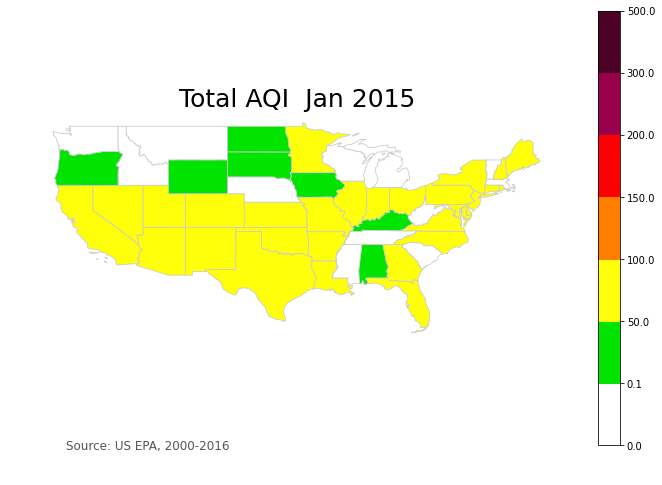

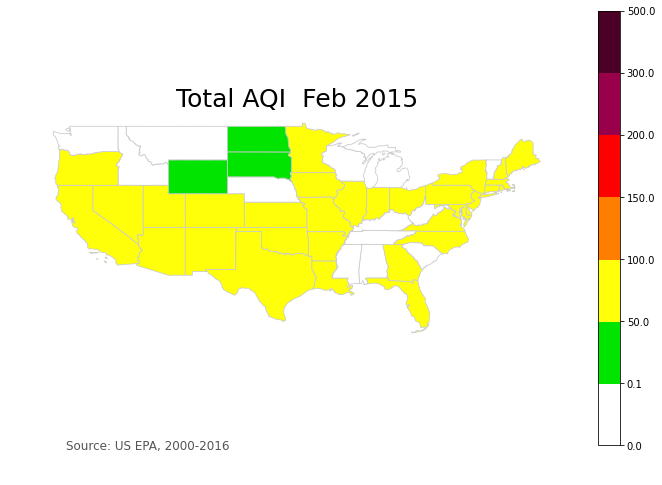

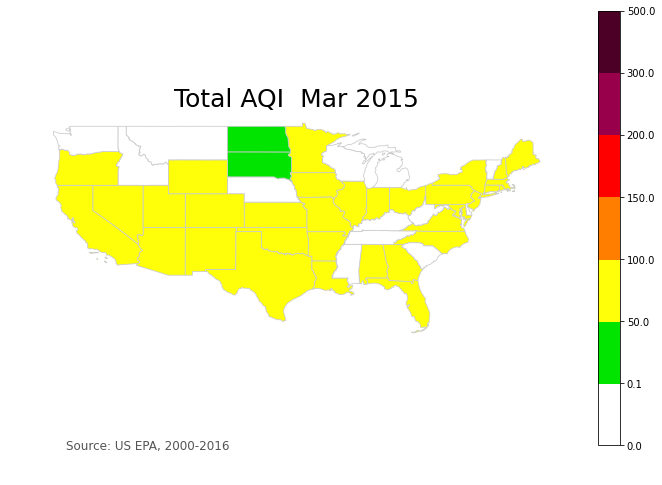

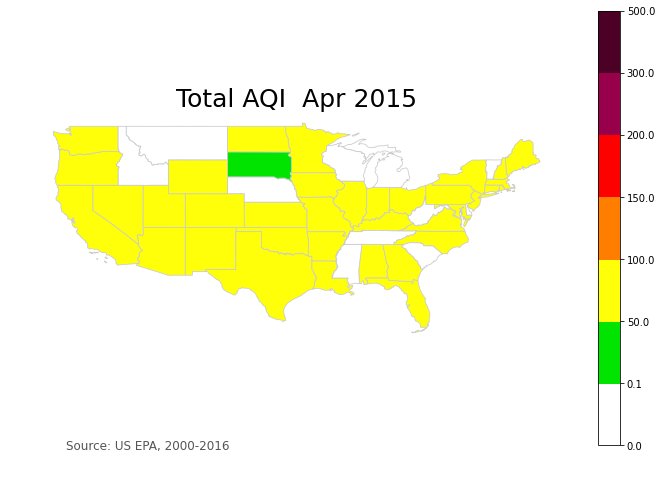

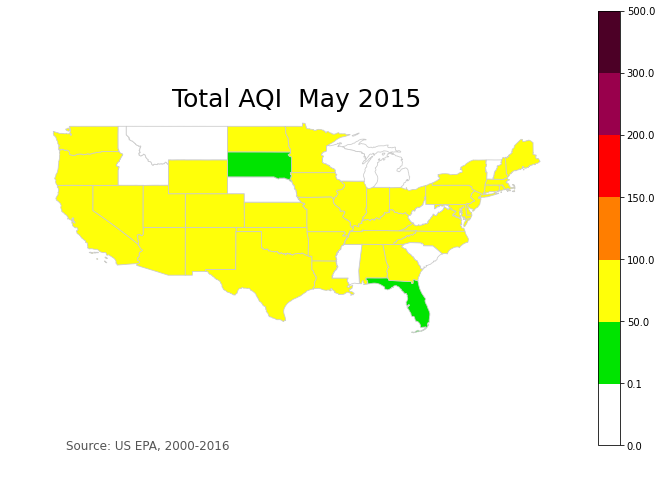

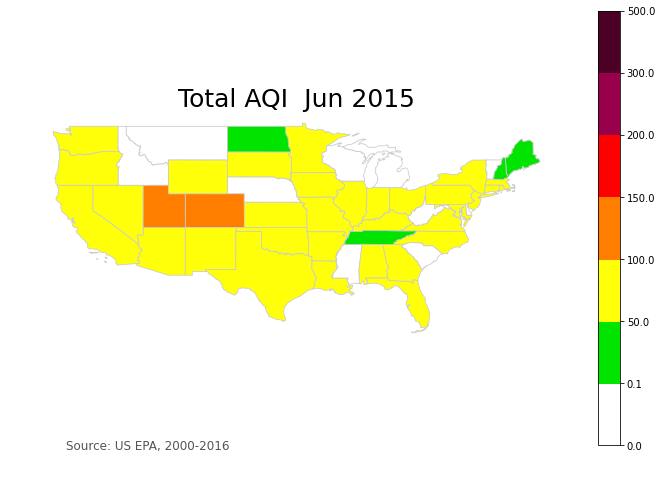

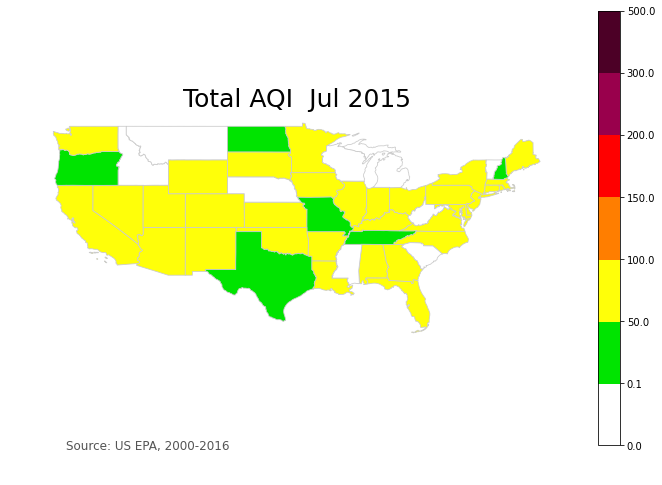

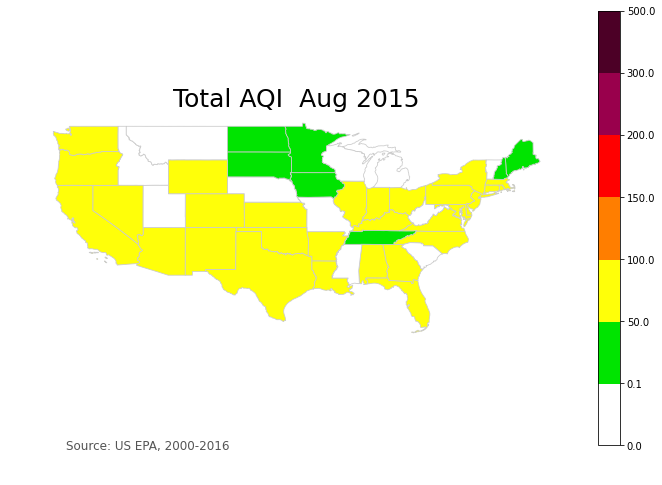

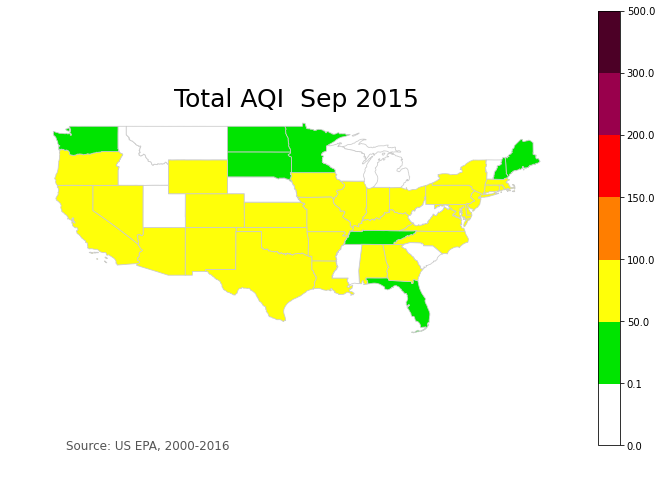

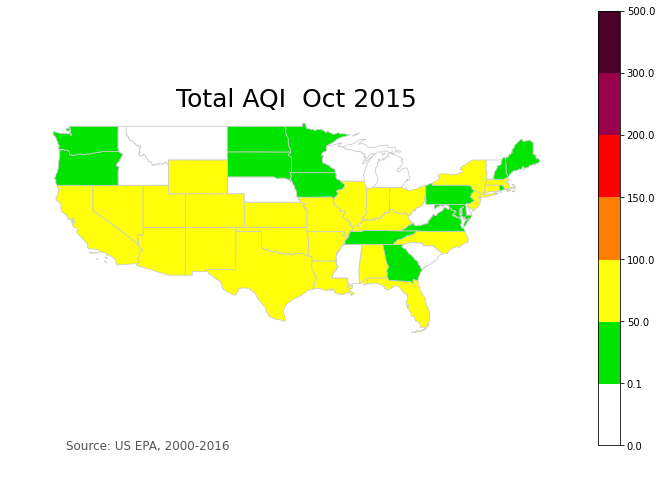

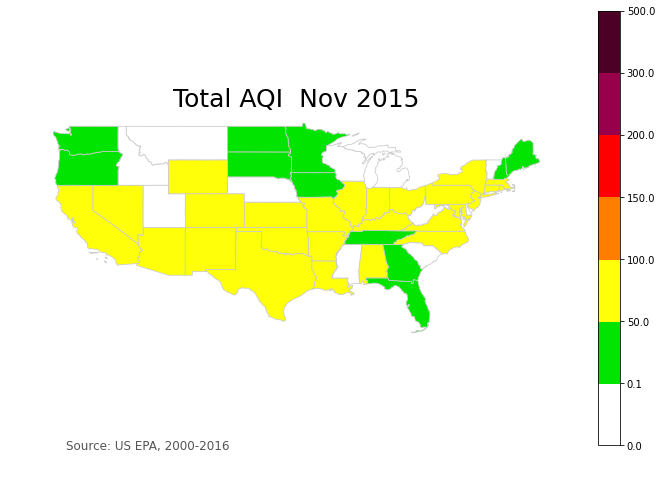

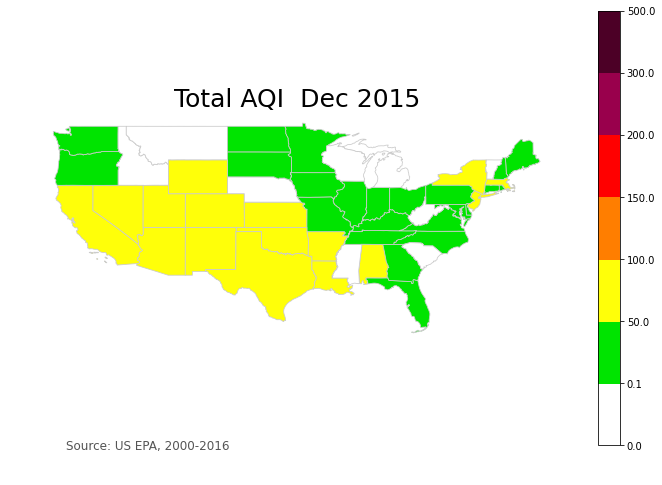

In [57]:
for i in range(1,13):
    plot_month(df2015, i, 'Total AQI')
    

    plt.savefig(str(i)+'_usa.jpg', dpi=300)

    

In [ ]:
df2015[df2015['Total AQI'] > 100]

In [ ]:
convert -delay 60 -loop 0 1_usa.jpg 2_usa.jpg 3_usa.jpg 4_usa.jpg 5_usa.jpg 6_usa.jpg 7_usa.jpg 8_usa.jpg 9_usa.jpg 10_usa.jpg 11_usa.jpg 12_usa.jpg new_map_normal.gif

In [ ]:
clean['year'] = clean['Date Local'].apply(lambda x: x[:4]).astype(int)

In [ ]:

def tvalue2(df1, df2, col):
    tstat, pvalue = sc.ttest_ind(df1[~df1[col].isna()][col],df2[~df2[col].isna()][col])
    return col, tstat, pvalue


In [ ]:
t_year_to_year = []
for i in range(2000,2015):
    yr = clean[(clean[['year']] == i).any(1)]
    yr = yr.drop(['State', 'Date Local','year','Address'], axis=1)
    next_yr = clean[(clean[['year']] == i+1).any(1)]
    next_yr = next_yr.drop(['State', 'Date Local','year','Address'], axis=1)
    cols_list = yr.columns
    
    for col in cols_list:
        t_year_to_year.append((i,i+1))
        t_year_to_year.append(tvalue2(yr, next_yr, col))

In [ ]:
t_year_to_year

In [ ]:
start = clean[(clean[['year']] == 2000).any(1)]
start = start.drop([
       'State', 'Date Local','year','Address'], axis=1)

In [ ]:
end = clean[(clean[['year']] == 2015).any(1)]

end = end.drop([
       'State', 'Date Local','year', 'Address'], axis=1)

In [ ]:
tvalue2(start,end,'CO AQI')

In [ ]:
start

In [18]:
import folium

In [19]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [20]:
state_abbrevs = {v:k for k,v in states.items()}

In [21]:
df_2015 = df2015.copy()
df_2015['State xx'] = df_2015['State'].map(state_abbrevs)

In [ ]:
df2015['Total AQI']

In [24]:
df_2015['Total AQI'] = df_2015['Total AQI'].apply(lambda x: x if x >0 else np.nan)

In [25]:

m = folium.Map(location=[48, -102], zoom_start=3)

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = df_2015[df_2015['Month']==8][['State xx', 'Total AQI']]
bins = list([0,50,100,150,200,300,500])


folium.Choropleth(
    geo_data=state_geo,
    data=state_data,
    columns=['State xx', 'Total AQI'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Total AQI (%)',
    bins=bins,
    reset=True
).add_to(m)

m

In [ ]:

m = folium.Map(location=[48, -102], zoom_start=3)

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = df_2015[df_2015['Month']==8][['State xx', 'Total AQI']]
bins = list([0,50,100,150,200,300,500])


folium.Choropleth(
    geo_data=state_geo,
    data=state_data,
    columns=['State xx', 'Total AQI'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Total AQI (%)',
    bins=bins,
    reset=True
).add_to(m)

m